# Review of classical electronic structure methods 

In order to assess the performance of quantum computing algorithms in addressing the electronic structure problem, we will briefly review a few commonly employed classical electronic structure methods of varying level of approximation. 

## Hartree-Fock

The Hartree-Fock (HF) method employs a **mean-field approximation**, where Coulomb correlation of electrons is neglected. The HF wavefunction is hence restricted to the form of a single Slater determinant, for which the optimal form may be acquired by an optimization of the underlying single particle basis (orbitals). Once the optimal HF orbitals have been found, the HF state may be written as 

$$ | \text{HF} \rangle = \prod_{p \in \text{occ}} \hat a^\dagger_p | \text{vac} \rangle $$

where $\hat a^\dagger_p$ creates an electron in the $p^{\rm{th}}$ optimized HF spin orbital, and  $| \text{vac} \rangle$ is the vacuum state (all spin-orbitals unoccupied). Due to the restriction to a single Slater determinant, the HF energy may be obtained very efficiently and can be applied to very large molecules, however it becomes qualitatively incorrect when **electronic correlations** become sufficiently strong. The HF wavefunction is often used as a starting point in more accurate treatments of electronic correlation. 

## Coupled cluster

The Coupled cluster (CC) method introduces electronic correlation to the wavefunction ansatz by operating on the HF reference state with the exponential of excitation operators

$$|\text{CC} \rangle = e^{\hat T} | \text{HF}\rangle, \quad \hat T = \hat T_1 + \hat T_2 + ...$$

where $\hat T_1 = \sum_{ia} t^{a}_i \hat a^\dagger_a \hat a_i$ are referred to as 'singles', $\hat T_2 = \sum_{ijab} t^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j$ as 'doubles', etc. When the excitation rank is truncated to only singles (S) and doubles (D), $\hat T = \hat T_1 + \hat T_2$, the corresponding ansatz is referred to as CCSD. Since the number of possible single and double excitations for a system of $N$ electrons in $M$ orbitals is polynomial in $M$, one can efficiently solve a system of equations to obtain the optimized CCSD amplitudes. CCSD often gives accurate energies and can be applied to modestly sized chemical systems. However, due to its implementation, it can **violate the variational principle** and give energies lower than the ground state.

## Full Configuration Interaction
The full configuration interaction (FCI) method yields the **exact ground state energy** within a given basis set. The FCI wavefunction is written as a linear combination of all possible $N$-particle Slater determinants over the orbital basis
$$|\text{FCI} \rangle =  \left( \sum_{ia} C^{a}_i \hat a^\dagger_a \hat a_i + \sum_{ijab} C^{ab}_{ij} \hat a^\dagger_a \hat a^\dagger_b \hat a_i \hat a_j + ...  \right) | \text{HF} \rangle $$
where the sum includes up to $N$-electron excitations, and hence there are an exponential number of coefficients to optimize in $| \text{FCI} \rangle$. Due to its **exponential complexity**, FCI is often reserved for only the smallest chemical systems. However, it serves as a useful result to compare to when assessing tractable electronic structure methods.

# Benchmarking for electronic PESs in minimal basis (STO-3G)

We will apply HF, CCSD, and FCI to obtaining the PESs for a few molecular dissociation processes in minimal (STO-3G) basis.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utility import get_molecular_data, obtain_PES

basis = 'sto-3g'

## LiH

In [2]:
bond_lengths = np.linspace(1,3,15)

In [3]:
#Run FCI
FCI_PES = obtain_PES('lih', bond_lengths, basis, method='fci')

E = -7.784460280267016 Eh
E = -7.838532793015942 Eh
E = -7.867260599272532 Eh
E = -7.8800499257249035 Eh
E = -7.882668561853681 Eh
E = -7.878838919757147 Eh
E = -7.871066731850017 Eh
E = -7.861087772411142 Eh
E = -7.850131693648891 Eh
E = -7.839087535062377 Eh
E = -7.828604512640165 Eh
E = -7.8191419915131855 Eh
E = -7.81098239090747 Eh
E = -7.8042325182119985 Eh
E = -7.798843159455239 Eh


In [4]:
#Run HF
HF_PES = obtain_PES('lih', bond_lengths, basis,  method='hf')

E = -7.767438446509383 Eh
E = -7.821849505669428 Eh
E = -7.850229846806818 Eh
E = -7.861943682878417 Eh
E = -7.862747590802051 Eh
E = -7.856344995556068 Eh
E = -7.845203171005111 Eh
E = -7.830998803612782 Eh
E = -7.814885201329364 Eh
E = -7.797666849047898 Eh
E = -7.779919081959606 Eh
E = -7.762070331572241 Eh
E = -7.744455337326585 Eh
E = -7.7273449797792555 Eh
E = -7.710958961728265 Eh


In [5]:
#Run CCSD
CCSD_PES = obtain_PES('lih', bond_lengths, basis,  method='ccsd')

E = -7.784453781342631 Eh
E = -7.838525747136908 Eh
E = -7.867252454615895 Eh
E = -7.880040093072626 Eh
E = -7.882656692757964 Eh
E = -7.878825017601876 Eh
E = -7.87105073578651 Eh
E = -7.861069226073766 Eh
E = -7.850109670097416 Eh
E = -7.839060594463019 Eh
E = -7.828570729160714 Eh
E = -7.819099150457594 Eh
E = -7.810928442828664 Eh
E = -7.8041661393903095 Eh
E = -7.798764080782396 Eh


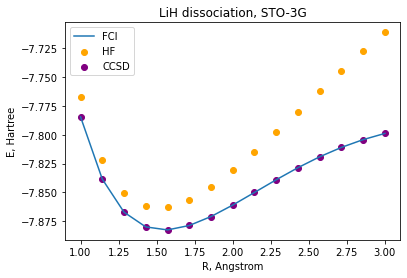

In [6]:
#Plot H2 PESs

plt.title('LiH dissociation, STO-3G')
plt.xlabel('R, Angstrom')
plt.ylabel('E, Hartree')

plt.plot(bond_lengths, FCI_PES, label='FCI')
plt.scatter(bond_lengths, HF_PES, label='HF', color='orange')
plt.scatter(bond_lengths, CCSD_PES, label='CCSD', color='purple')
plt.legend()